<a href="https://colab.research.google.com/github/LazaroR-u/Thesis_Data_Analysis_CMS_CERN/blob/main/COMPARISON_MAP_FUNCTIONS_LRDL_BUAP_CERN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import numpy as np

In [75]:
def convert_dpid_name(df_data, df_mapping):

    # Take df colums to numpy array
    k = df_mapping['DPID2'].to_numpy()
    v = df_mapping['CHAMBER_NAME'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

In [76]:
def individual_wheel(wheel, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished wheel
    df_wheel = df_data[np.where(df_data['Chamber_name'].str.find(wheel) == 0, True, False) == True]
    #just return the wheel
    return df_wheel

In [77]:
def select_endcap(region, voltage, df_data):

    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]

    # Filter for select the wished endcap
    df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]

    '''if region == 'RE-' or region =='RE+':
        df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') != 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]
    else:
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]'''

    return df_endcap

In [78]:
def filter_current_data(data_required, date):

    df_date_to_plot = data_required[np.where(data_required['DATE'].str.find(date) == 0, True, False) == True]
    df_current = df_date_to_plot['AVG_IMON']

    return df_current

In [79]:
def plot(data_to_plot, dates_array, bins=80):
    #define an array of specific colors
    colors = np.array(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#449166','#6d9509','#1f465e'])
    handles = []
    labels = []
    #create a figure of subplots
    fig, ax = plt.subplots()

    for i, j in enumerate(dates_array):
        #filter the data to return only entries with the desired date
        df_date_to_plot = data_to_plot[np.where(data_to_plot['DATE'].str.find(j) == 0, True, False) == True]
        df_current = df_date_to_plot['AVG_IMON']
        #if the mean current in this date is a nan then print there is not data available, else pass
        if np.isnan(round(df_current.mean(),2)):
            print(f"There is no data available for: {j}")
            continue
        #creates a mean currents histogram
        histogr = df_current.plot.hist(bins=bins, alpha=1.0, color=colors[i],  histtype='step', linewidth=2, range=(0, 20))

        handles.append(Rectangle((0,0), 1, 1, color=colors[i], ec="k"))
        labels.append(j + f"-mean: {round(df_current.mean(),2)} uA")


    # Xlabel
    ax.xaxis.set_label_coords(0.90, -0.055)
    ax.set_xlabel(r'$I(\mu A)$', fontsize = 22)

    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel('Entries', fontsize = 22)

    #print this objects in the plot
    plt.legend(handles, labels)

    # CMS format
    hfont = {'fontname':'italic'}
    plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
    plt.text(0.23, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure)

    plt.grid()

    ## Takes the first element column chamber name in order to save with the correct name
    # This works for W+-2 and W+-1
    name = data_to_plot['Chamber_name'].to_numpy()[1][0:3]
    # This works for
    if name[2] == '_':
        name = name[0:2]

    plt.savefig("Current_distribution_" + name +".png")

# LOAD THE DATA

In [80]:

# Transform the .csv in a panda dataframe
df_data = pd.read_csv('/content/last_data_2023.csv')

# Mapping between dpid and chamber name

df_mapping = pd.read_csv('https://raw.githubusercontent.com/Mapse/RPC_Currents/main/RPC_Chamber_HV_Map.csv')

df_data = df_data.dropna()
df_data['DPID'] = df_data['DPID'].astype(int)

df_data_map2 = pd.read_csv('/content/last_data_2023_map.csv')

voltage =9200

df_mapping

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701,RE-1_R2_CH18


## MAP FUNCTION 1

In [81]:
df_data_map1 = convert_dpid_name(df_data, df_mapping)
df_data_map1

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...
63827,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.31.06.000000000 PM,21-JUN-23 12.45.32.000000000 PM,8000,3.8,RE-1_R2_CH18
63828,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 12.45.44.000000000 PM,21-JUN-23 01.00.31.000000000 PM,8500,4.2,RE-1_R2_CH18
63829,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-1_R2_CH18
63830,216701,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-1_R2_CH18


## MAP FUNCTION 2

In [82]:
df_mapping_dup = df_mapping[df_mapping["DPID2"].duplicated(keep=False)]
df_mapping_dup

,DPID2,CHAMBER_NAME
481,142824,RE+2_R3_CH02
482,142824,RE+1_R3_CH29
483,142825,RE+1_R3_CH31
484,142825,RE+1_R2_CH29
485,142826,RE+2_R3_CH03
...,...,...
1042,216670,RE+3_R2_CH33
1045,216689,RE-1_R3_CH10
1046,216689,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11


In [83]:
import pandas as pd

def cambia_ids_repetidos(df):
    # Crea un diccionario para rastrear las apariciones de cada ID
    id_count = {}

    # Función para generar sufijos únicos
    def generar_sufijo(count):
        letras = 'abcdefghijklmnopqrstuvwxyz'
        sufijo = ''
        while count >= len(letras):
            sufijo += letras[count % len(letras)]
            count //= len(letras)
        sufijo += letras[count]
        return sufijo

    # Recorre las filas del DataFrame
    for index, row in df.iterrows():
        dpid = row['DPID2']
        if dpid in id_count:
            # ID repetido encontrado
            count = id_count[dpid]
            sufijo = generar_sufijo(count)
            id_count[dpid] += 1
            df.at[index, 'DPID2'] = f'{dpid}{sufijo}'
        else:
            # Primer encuentro del ID, agregamos al diccionario
            id_count[dpid] = 1

    return df

# Ejemplo de uso

df_mapping_2 = cambia_ids_repetidos(df_mapping)

df_mapping_2

,DPID2,CHAMBER_NAME
0,315,W+2_RB1in_S01
1,316,W+2_RB1out_S01
2,317,W+2_RB2in_S01
3,318,W+2_RB2out_S01
4,319,W+2_RB3-_S01
...,...,...
1045,216689,RE-1_R3_CH10
1046,216689b,RE-1_R3_CH04
1047,216701,RE-2_R2_CH11
1048,216701b,RE-1_R2_CH18


In [84]:
df_mapping_2_dup = df_mapping_2[df_mapping_2["DPID2"].isin(df_mapping_dup["DPID2"])]
df_mapping_2_dup

,DPID2,CHAMBER_NAME
481,142824,RE+2_R3_CH02
483,142825,RE+1_R3_CH31
485,142826,RE+2_R3_CH03
487,142827,RE+2_R3_CH07
489,142828,RE+1_R2_CH36
...,...,...
1037,216668,RE+2_R3_CH34
1039,216669,RE+2_R3_CH32
1041,216670,RE+2_R3_CH35
1045,216689,RE-1_R3_CH10


In [85]:
import pandas as pd
# function to add the suffix a
def agregar_letra(indice):
    return f'{indice}a'

# apply the function only with the reapeted DPID
df_mapping_2['DPID2'] = df_mapping_2['DPID2'].apply(lambda x: agregar_letra(x) if x in df_mapping_2_dup['DPID2'].values else x)

# show the dataframe
print(df_mapping_2)

        DPID2    CHAMBER_NAME
0         315   W+2_RB1in_S01
1         316  W+2_RB1out_S01
2         317   W+2_RB2in_S01
3         318  W+2_RB2out_S01
4         319    W+2_RB3-_S01
...       ...             ...
1045  216689a    RE-1_R3_CH10
1046  216689b    RE-1_R3_CH04
1047  216701a    RE-2_R2_CH11
1048  216701b    RE-1_R2_CH18
1049   216707    RE-3_R3_CH22

[1050 rows x 2 columns]


In [86]:
df_data = df_data.drop(columns = "Chamber_name")

In [87]:
def convert_dpid_name_2(df_data, df_mapping_2):

    # Take df colums to numpy array
    k = df_mapping_2['DPID2'].to_numpy()
    v = df_mapping_2['CHAMBER_NAME'].to_numpy()

    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))

    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)

    df_data_mapped = df_data

    return df_data_mapped

In [88]:

# Crear un DataFrame vacío para almacenar los resultados
df_data_map = pd.DataFrame(columns=df_data.columns)

# Iterar sobre las filas de df_prueba
for index, row in df_data.iterrows():
    dpid = row['DPID']

    # Verificar si el valor de DPID está en df_mapping_dup["DPID2"]
    if dpid in df_mapping_dup["DPID2"].values:
        # Duplicar la fila con sufijos "a" y "b"
        nueva_fila_a = row.copy()
        nueva_fila_a['DPID'] = f'{dpid}a'
        df_data_map = df_data_map.append(nueva_fila_a, ignore_index=True)

        nueva_fila_b = row.copy()
        nueva_fila_b['DPID'] = f'{dpid}b'
        df_data_map = df_data_map.append(nueva_fila_b, ignore_index=True)
    else:
        # Si el valor no está en df_mapping_dup, simplemente agregar la fila original
        df_data_map = df_data_map.append(row, ignore_index=True)

# Mostrar el DataFrame de resultados
df_data_map

<ipython-input-88-64c3058f204b>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data_map = df_data_map.append(row, ignore_index=True)
<ipython-input-88-64c3058f204b>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data_map = df_data_map.append(nueva_fila_a, ignore_index=True)
<ipython-input-88-64c3058f204b>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data_map = df_data_map.append(nueva_fila_b, ignore_index=True)


,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0
...,...,...,...,...,...,...
88280,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2
88281,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
88282,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6
88283,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6


In [89]:
#df_data_map.drop(columns="Chamber_name")
df_data_map2 =convert_dpid_name_2(df_data_map, df_mapping)

In [90]:
df_data_map2

,DPID,DATE,START_DATE,STOP_DATE,V_APPLIED,AVG_IMON,Chamber_name
0,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.32.000000000 PM,1000,0.0,W+2_RB1in_S01
1,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 12.51.54.000000000 PM,27-JUL-18 01.01.32.000000000 PM,1500,0.0,W+2_RB1in_S01
2,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.02.01.000000000 PM,27-JUL-18 01.11.33.000000000 PM,2000,0.0,W+2_RB1in_S01
3,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.11.59.000000000 PM,27-JUL-18 01.21.35.000000000 PM,2500,0.0,W+2_RB1in_S01
4,315,27-JUL-18 12.42.10.000000000 PM,27-JUL-18 01.21.59.000000000 PM,27-JUL-18 01.31.34.000000000 PM,3000,0.0,W+2_RB1in_S01
...,...,...,...,...,...,...,...
88280,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.00.59.000000000 PM,21-JUN-23 01.15.34.000000000 PM,9000,4.2,RE-1_R2_CH18
88281,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-2_R2_CH11
88282,216701b,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.15.39.000000000 PM,21-JUN-23 01.30.27.000000000 PM,9200,4.6,RE-1_R2_CH18
88283,216701a,21-JUN-23 11.01.16.000000000 AM,21-JUN-23 01.30.27.000000000 PM,21-JUN-23 04.35.27.000000000 PM,9400,4.6,RE-2_R2_CH11


In [91]:
df_data_map2.to_csv('last_data_map.csv', index=False)

from google.colab import files

files.download('last_data_map.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## comparison unique chambers map1 vs map2

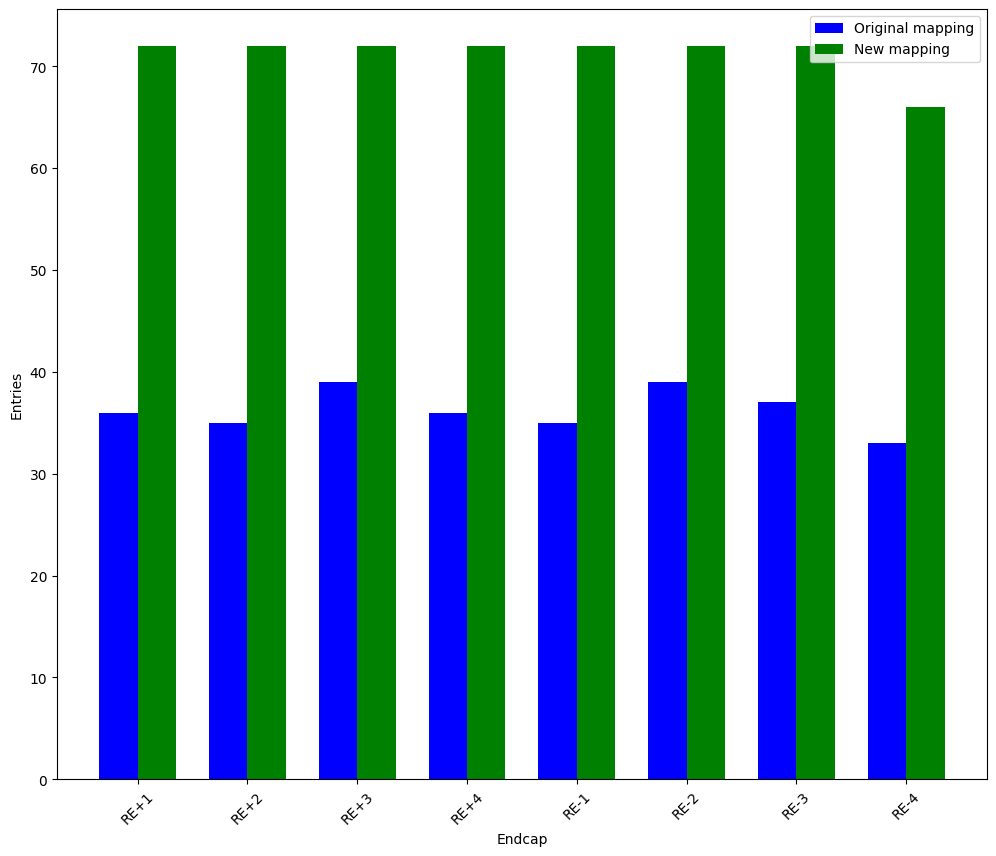

In [92]:
n1_RE_plus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+1") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+2") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_3 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+3") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_plus_4 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE+4") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-1") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-2") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_3 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-3") == 0, True, False) == True]["Chamber_name"].unique())
n1_RE_minus_4 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("RE-4") == 0, True, False) == True]["Chamber_name"].unique())


group1 = { "RE+1" : n1_RE_plus_1, "RE+2":n1_RE_plus_2, "RE+3":n1_RE_plus_3, "RE+4":n1_RE_plus_4,
         "RE-1" : n1_RE_minus_1, "RE-2":n1_RE_minus_2, "RE-3":n1_RE_minus_3, "RE-4":n1_RE_minus_4}

n_RE_plus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+1") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+2") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_3 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+3") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_plus_4 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE+4") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-1") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-2") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_3 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-3") == 0, True, False) == True]["Chamber_name"].unique())
n_RE_minus_4 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("RE-4") == 0, True, False) == True]["Chamber_name"].unique())


group2 = { "RE+1" : n_RE_plus_1, "RE+2":n_RE_plus_2, "RE+3":n_RE_plus_3, "RE+4":n_RE_plus_4,
         "RE-1" : n_RE_minus_1, "RE-2":n_RE_minus_2, "RE-3":n_RE_minus_3, "RE-4":n_RE_minus_4}

# Etiquetas de los grupos
plt.figure(figsize=(12,10))

labels = list(group1.keys())
x = np.arange(len(labels))

# Altura de las barras
values1 = list(group1.values())
values2 = list(group2.values())

# Ancho de las barras
bar_width = 0.35

# Crear un gráfico de barras para comparar los dos grupos
plt.bar(x - bar_width/2, values1, bar_width, label='Original mapping', color='b', align='center')
plt.bar(x + bar_width/2, values2, bar_width, label='New mapping', color='g', align='center')

# Etiquetas y título
plt.xlabel('Endcap')
plt.ylabel('Entries')
#plt.title('Comparación de entradas por Endcap usando el mapeo original y el nuevo')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

In [93]:
n_RE_plus_1, n_RE_plus_2, n_RE_plus_3, n_RE_plus_4, n_RE_minus_1, n_RE_minus_2, n_RE_minus_3, n_RE_minus_4

(72, 72, 72, 72, 72, 72, 72, 66)

In [94]:
 n1_RE_plus_1, n1_RE_plus_2, n1_RE_plus_3, n1_RE_plus_4, n1_RE_minus_1, n1_RE_minus_2, n1_RE_minus_3, n1_RE_minus_4

(36, 35, 39, 36, 35, 39, 37, 33)

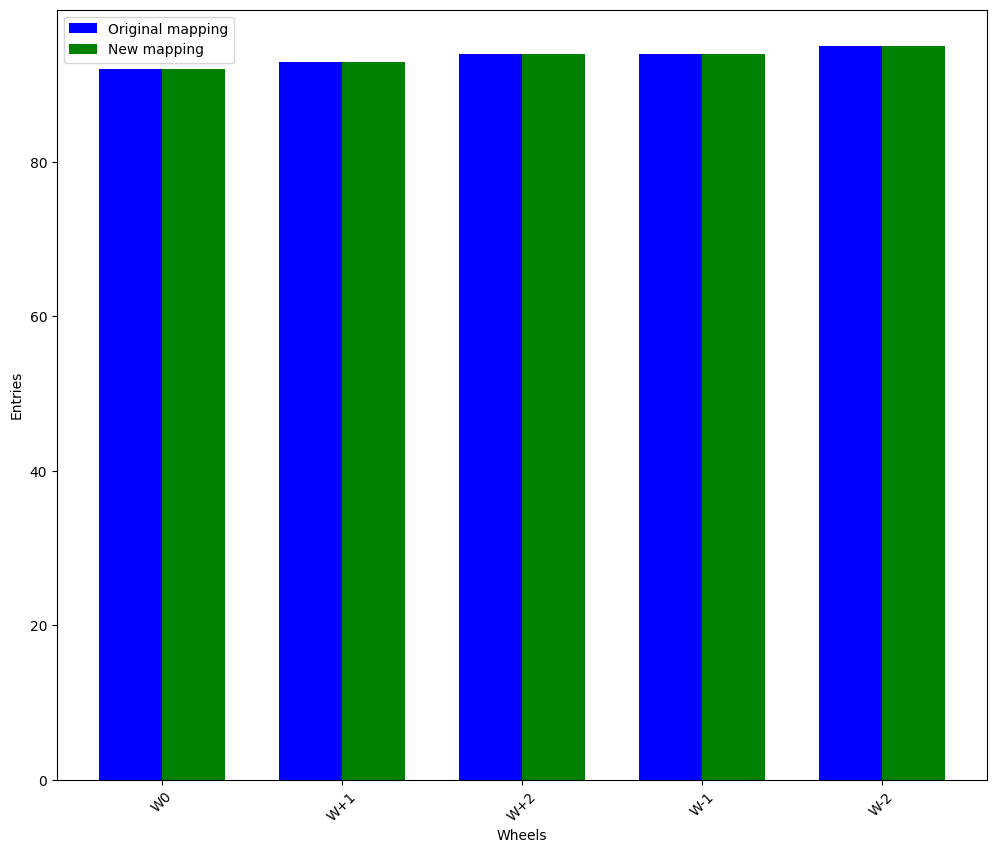

In [95]:
n1_W_plus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W+1") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_plus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W+2") == 0, True, False) == True]["Chamber_name"].unique())
n1_W0 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W0") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_minus_1 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W-1") == 0, True, False) == True]["Chamber_name"].unique())
n1_W_minus_2 = len(df_data_map1[np.where(df_data_map1['Chamber_name'].str.find("W-2") == 0, True, False) == True]["Chamber_name"].unique())


groupW1 = {"W0": n1_W0 ,"W+1" : n1_W_plus_1, "W+2":n1_W_plus_2,
         "W-1" : n1_W_minus_1, "W-2":n1_W_minus_2}

n2_W_plus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W+1") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_plus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W+2") == 0, True, False) == True]["Chamber_name"].unique())
n2_W0 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W0") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_minus_1 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W-1") == 0, True, False) == True]["Chamber_name"].unique())
n2_W_minus_2 = len(df_data_map2[np.where(df_data_map2['Chamber_name'].str.find("W-2") == 0, True, False) == True]["Chamber_name"].unique())


groupW2 = {"W0": n2_W0 ,"W+1" : n2_W_plus_1, "W+2":n2_W_plus_2,
         "W-1" : n2_W_minus_1, "W-2":n2_W_minus_2}
# Etiquetas de los grupos
plt.figure(figsize=(12,10))
labels = list(groupW1.keys())
x = np.arange(len(labels))

# Altura de las barras
values1 = list(groupW1.values())
values2 = list(groupW2.values())

# Ancho de las barras
bar_width = 0.35

# Crear un gráfico de barras para comparar los dos grupos
plt.bar(x - bar_width/2, values1, bar_width, label='Original mapping', color='b', align='center')
plt.bar(x + bar_width/2, values2, bar_width, label='New mapping', color='g', align='center')

# Etiquetas y título
plt.xlabel('Wheels')
plt.ylabel('Entries')
#plt.title('Comparación de entradas por Wheel usando el mapeo original y el nuevo')
plt.xticks(x, labels, rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

In [96]:
n1_W_plus_1 + n1_W_plus_2 + n1_W0 + n1_W_minus_1 + n1_W_minus_2 #+ n2_W_plus_1 + n2_W_plus_2 + n2_W0 + n2_W_minus_1 + n2_W_minus_2

468

Parece ser que solo se mapean 468 camaras en las wheels, sin embargo, deberiamos tener 480. Esto puede significar que hay camaras que estan mal escritas que no estan dentro de W+1,W+2,W0,W-1,W-2.

## Wheels plot map1 vs map2

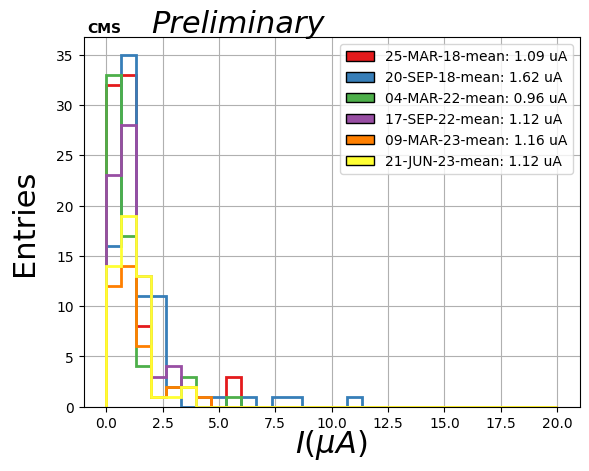

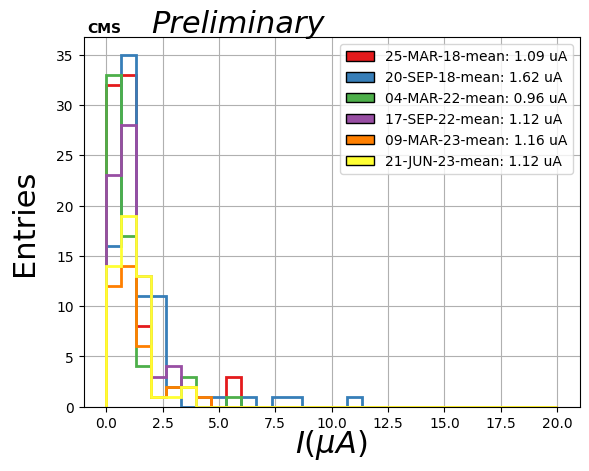

In [97]:
voltage = 7000

dates = np.array(['25-MAR-18', "20-SEP-18", "04-MAR-22", "17-SEP-22", "09-MAR-23", "21-JUN-23"])
Wminus2 = individual_wheel('W-2', voltage, df_data = df_data_map1)
plot(Wminus2, dates, bins=30)

Wminus2b = individual_wheel('W-2', voltage, df_data = df_data_map2)
plot(Wminus2b, dates, bins=30)

There is no data available for: 04-MAR-22


There is no data available for: 04-MAR-22


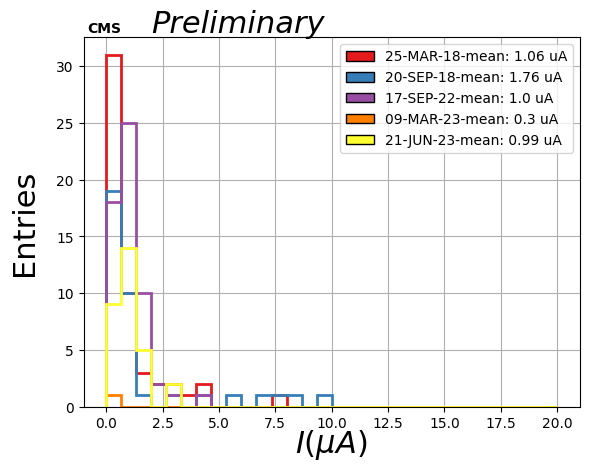

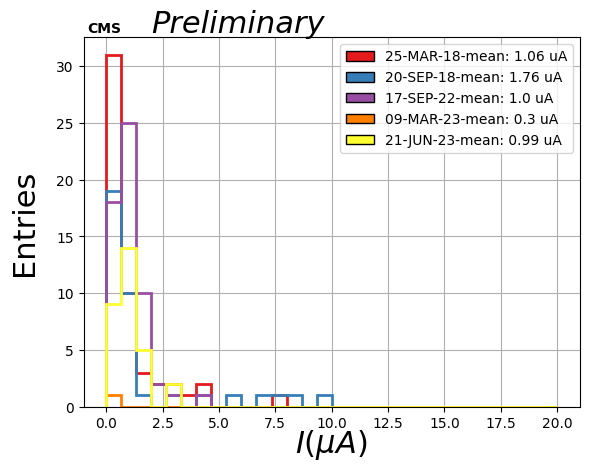

In [98]:
Wminus1 = individual_wheel('W-1', voltage, df_data = df_data_map1)
plot(Wminus1, dates, bins=30)

Wminus1b = individual_wheel('W-1', voltage, df_data = df_data_map2)
plot(Wminus1b, dates, bins=30)

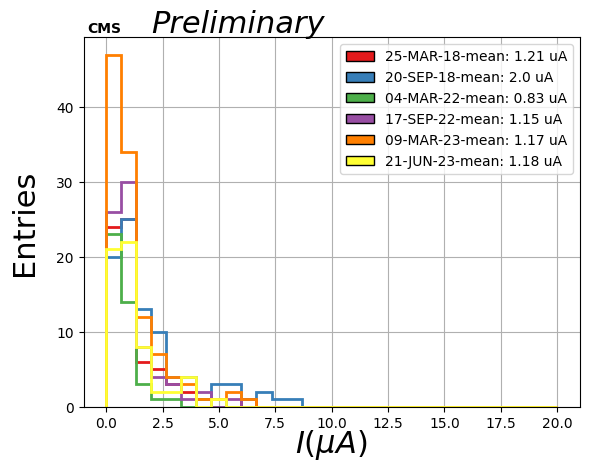

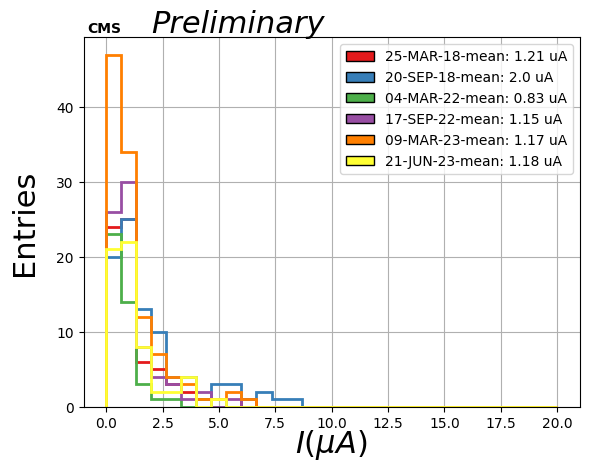

In [99]:
Wplus2 = individual_wheel('W+2', voltage, df_data = df_data_map1)
plot(Wplus2, dates, bins=30)

Wplus2b = individual_wheel('W+2', voltage, df_data = df_data_map2)
plot(Wplus2b, dates, bins=30)

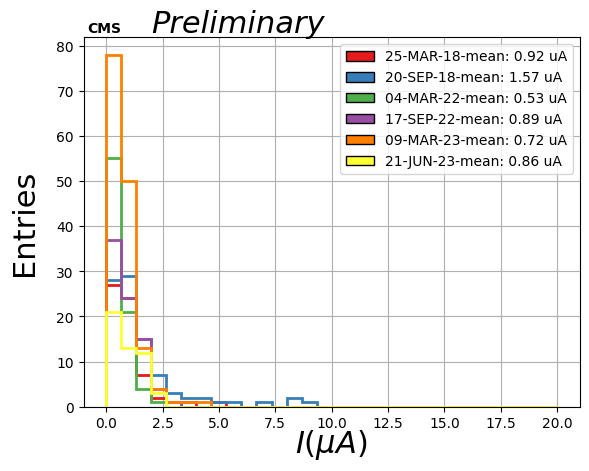

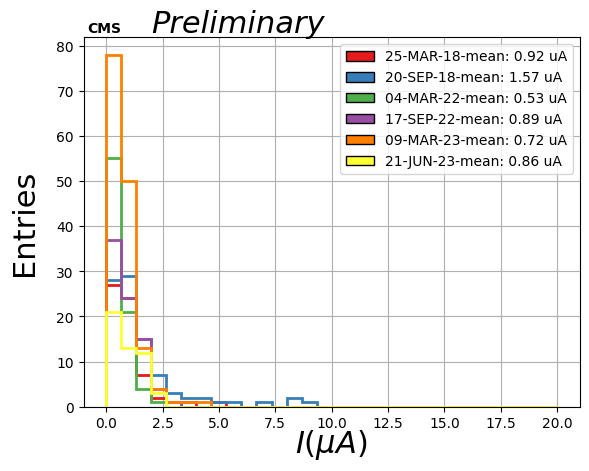

In [100]:
Wplus1 = individual_wheel('W+1', voltage, df_data = df_data_map1)
plot(Wplus1, dates, bins=30)

Wplus1b = individual_wheel('W+1', voltage, df_data = df_data_map2)
plot(Wplus1b, dates, bins=30)

There is no data available for: 04-MAR-22
There is no data available for: 09-MAR-23


There is no data available for: 04-MAR-22
There is no data available for: 09-MAR-23


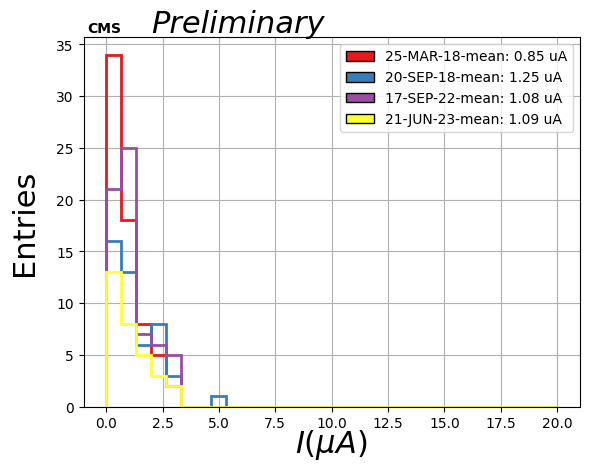

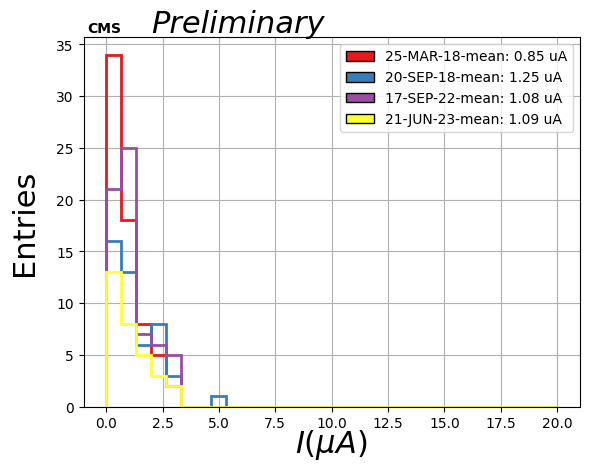

In [101]:
W0 = individual_wheel('W0', voltage, df_data = df_data_map1)
plot(W0, dates, bins=30)

W0b = individual_wheel('W0', voltage, df_data = df_data_map2)
plot(W0b, dates, bins=30)

## Endcaps plots map1 vs map2

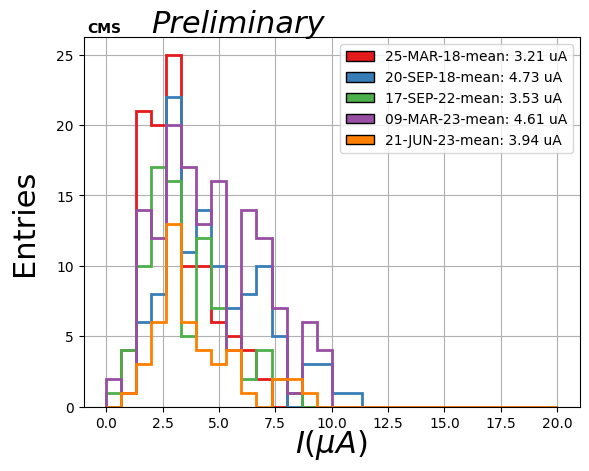

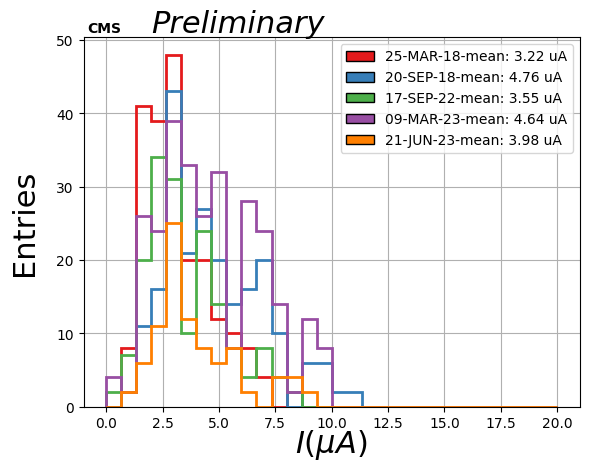

In [102]:
voltage = 7000
dates_ed = np.array(['25-MAR-18', "20-SEP-18", "17-SEP-22", "09-MAR-23", "21-JUN-23"])

RE_123 = pd.concat([select_endcap('RE+1', voltage, df_data = df_data_map1),
                    select_endcap('RE+2', voltage, df_data = df_data_map1),
                    select_endcap('RE+3', voltage, df_data = df_data_map1)],
                    ignore_index=True)

plot(RE_123, dates_ed, bins=30)


RE_123b = pd.concat([select_endcap('RE+1', voltage, df_data = df_data_map2),
                    select_endcap('RE+2', voltage, df_data = df_data_map2),
                    select_endcap('RE+3', voltage, df_data = df_data_map2)],
                    ignore_index=True)

plot(RE_123b, dates_ed, bins=30)

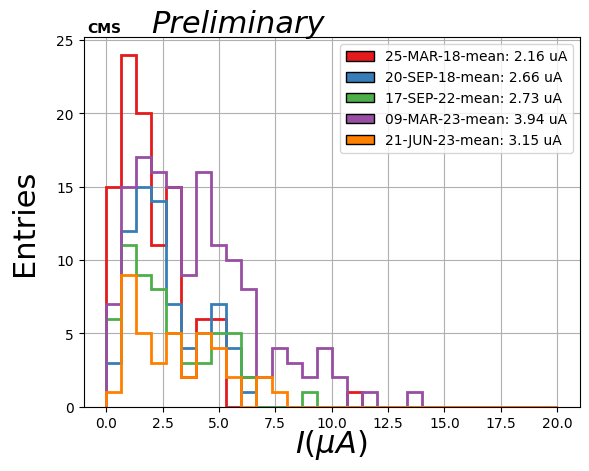

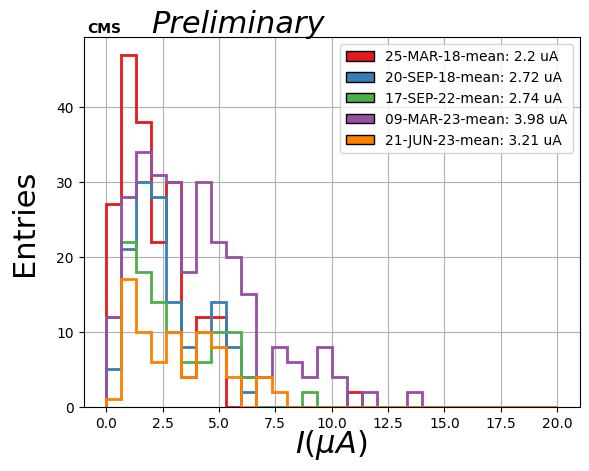

In [103]:
voltage = 7000
dates_ed = np.array(['25-MAR-18', "20-SEP-18", "17-SEP-22", "09-MAR-23", "21-JUN-23"])

RE_minus_123 = pd.concat([select_endcap('RE-1', voltage, df_data = df_data_map1),
                    select_endcap('RE-2', voltage, df_data = df_data_map1),
                    select_endcap('RE-3', voltage, df_data = df_data_map1)],
                    ignore_index=True)

plot(RE_minus_123, dates_ed, bins=30)


RE_minus_123b = pd.concat([select_endcap('RE-1', voltage, df_data = df_data_map2),
                    select_endcap('RE-2', voltage, df_data = df_data_map2),
                    select_endcap('RE-3', voltage, df_data = df_data_map2)],
                    ignore_index=True)

plot(RE_minus_123b, dates_ed, bins=30)

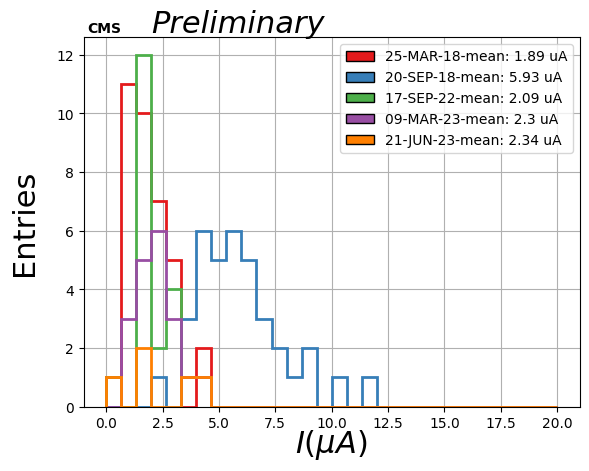

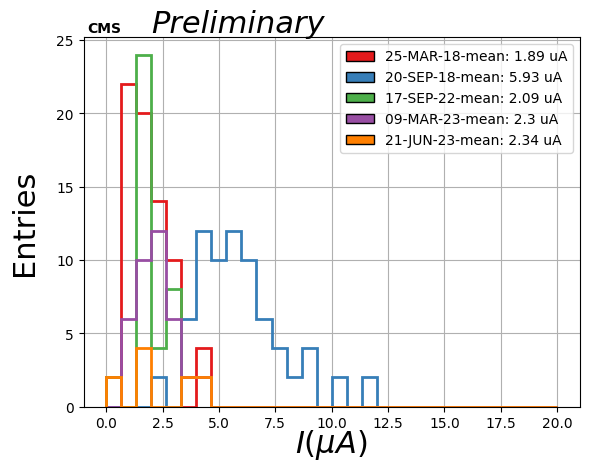

In [104]:

RE_4 = select_endcap('RE+4', voltage, df_data = df_data_map1)
plot(RE_4, dates_ed, bins=30)


RE_4b = select_endcap('RE+4', voltage, df_data = df_data_map2)
plot(RE_4b, dates_ed, bins=30)

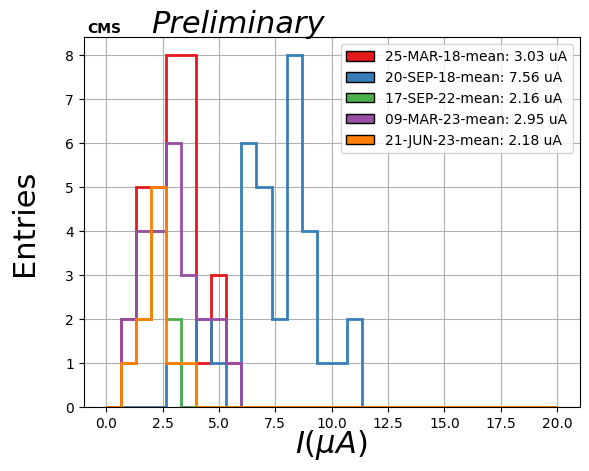

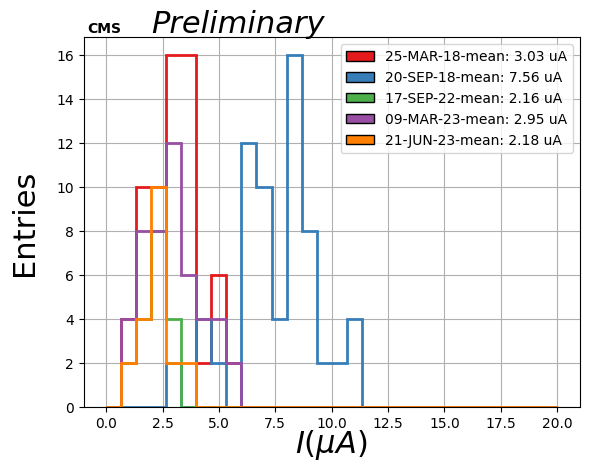

In [105]:

RE_minus_4 = select_endcap('RE-4', voltage, df_data = df_data_map1)
plot(RE_minus_4, dates_ed, bins=30)


RE_minus_4b = select_endcap('RE-4', voltage, df_data = df_data_map2)
plot(RE_minus_4b, dates_ed, bins=30)

## test

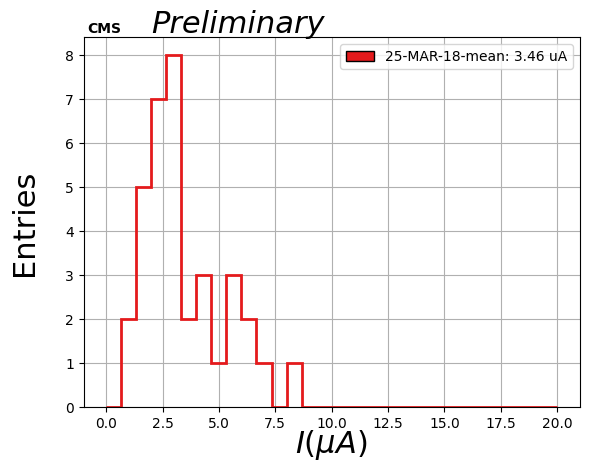

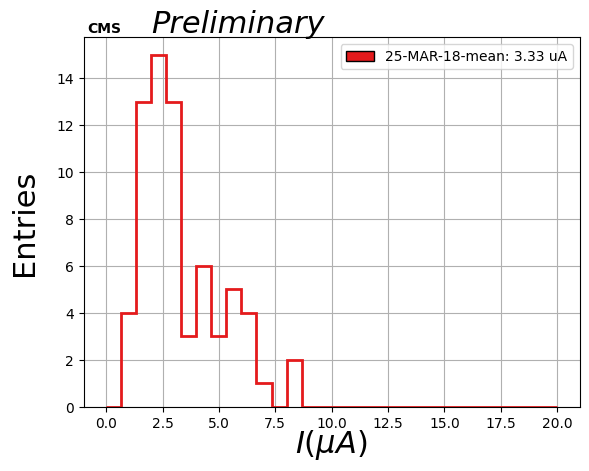

In [106]:
dates_ed = np.array(["25-MAR-18"])
RE = select_endcap('RE+1', voltage, df_data = df_data_map1)
plot(RE, dates_ed, bins=30)

REb = select_endcap('RE+1', voltage, df_data = df_data_map2)
plot(REb, dates_ed, bins=30)

In [108]:
df_mapping_2[~df_mapping_2["CHAMBER_NAME"].isin(df_data_map2["Chamber_name"])]

,DPID2,CHAMBER_NAME
85,414,W+2_RB3-_S11
92,422,W+2_RB3-_S12
126,2963,W+1_RB4--_S04
127,2964,W+1_RB4-_S04
129,2966,W+1_RB4++_S04
204,3054,W-1_RB4-_S02
205,3055,W-1_RB4+_S02
311,3179,W-2_RB4-_S04
399,6421,W0_RB4-_S01
422,6467,W0_RB3+_S04
